In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import numpy as np
from torchvision import models
import os
from tqdm import tqdm
import cv2

c:\Users\bot\anaconda3\envs\pytorch312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Fetch a pre-trained facenet-like model (InceptionResnetV1 from facenet-pytorch)
from facenet_pytorch import InceptionResnetV1

# Face detector
mtcnn = MTCNN(image_size=160, margin=0)

# Face recognition model (pretrained on VGGFace2)
base_model = InceptionResnetV1(pretrained='vggface2').eval()
print(base_model)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [3]:
# Load image
#img = Image.open(r'D:\Project11_face_recognition_facenet\EaintMyintMo\photo_6253512507016726109_y.jpg')
img = Image.open(r'D:\Project11_face_recognition_facenet\data_dir\KyawSwarTun\photo_6253334042535642846_y.jpg')

# Detect face and get cropped face tensor
face_tensor = mtcnn(img)

# Ensure face was detected
if face_tensor is not None:
    face_embedding = base_model(face_tensor.unsqueeze(0))

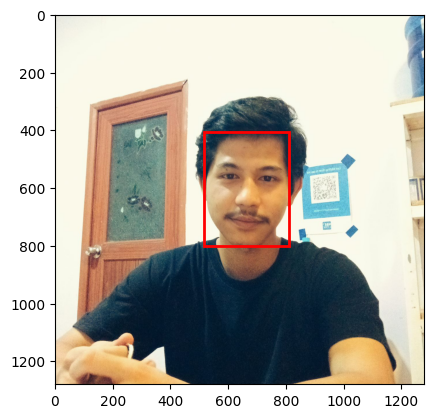

In [4]:
import matplotlib.pyplot as plt

# Detect faces and get bounding boxes
boxes, _ = mtcnn.detect(img)

# Convert image to numpy array for plotting
img_np = np.array(img)

# Plot image and draw bounding boxes
fig, ax = plt.subplots()
ax.imshow(img_np)

if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

plt.axis('on')  # Turn off axis

plt.show()

In [5]:
# Load and embed second image
#img2 = Image.open(r'D:\Project11_face_recognition_facenet\EaintMyintMo\photo_6253512507016726110_y.jpg')
img2 = Image.open(r'D:\Project11_face_recognition_facenet\data_dir\KyawSwarTun\photo_6253334042535642853_y.jpg')

face_tensor2 = mtcnn(img2)

if face_tensor2 is not None:
    embedding2 = base_model(face_tensor2.unsqueeze(0))

    # Compute Euclidean distance
    dist = torch.norm(face_embedding - embedding2)
    print(f'Distance: {dist.item()}')

    # Typically, threshold ~1.0
    if dist < 1.0:
        print("Same person")
    else:
        print("Different person")


Distance: 0.7217878103256226
Same person


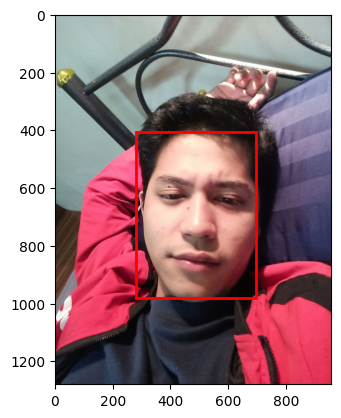

In [6]:
import matplotlib.pyplot as plt

# Detect faces and get bounding boxes
boxes, _ = mtcnn.detect(img2)

# Convert image to numpy array for plotting
img_np = np.array(img2)

# Plot image and draw bounding boxes
fig, ax = plt.subplots()
ax.imshow(img_np)

if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

plt.axis('on')  # Turn off axis

plt.show()

In [7]:
data_dir = r'D:\Project11_face_recognition_facenet\data_dir'

In [8]:
import os
import shutil
import random
from tqdm import tqdm


random.seed(42)

src_dir = data_dir
target_base = r'D:\Project11_face_recognition_facenet\data_dir_split'
splits = {'train': 0.60, 'valid': 0.20, 'test': 0.20}

# Get class names from subfolders
classes = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(target_base, split, cls), exist_ok=True)

# Prepare to store split counts
split_indices_per_class = {}
total_images = 0

print("Original and split counts per class:")
for cls in classes:
    img_dir = os.path.join(src_dir, cls)
    images = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
    random.shuffle(images)
    n_total = len(images)
    n_train = int(n_total * splits['train'])
    n_valid = int(n_total * splits['valid'])
    n_test = n_total - n_train - n_valid

    split_indices = {
        'train': images[:n_train],
        'valid': images[n_train:n_train + n_valid],
        'test': images[n_train + n_valid:]
    }
    split_indices_per_class[cls] = split_indices
    total_images += sum(len(files) for files in split_indices.values())

    print(f"Class '{cls}': total={n_total}, train={len(split_indices['train'])}, valid={len(split_indices['valid'])}, test={len(split_indices['test'])}")

print(f"\nTotal images to copy: {total_images}\n")

# Copy with a single progress bar
with tqdm(total=total_images, desc="Overall Progress", unit="img") as pbar:
    for cls, split_indices in split_indices_per_class.items():
        for split, files in split_indices.items():
            for f in files:
                src_path = os.path.join(src_dir, cls, f)
                dst_path = os.path.join(target_base, split, cls, f)
                shutil.copy2(src_path, dst_path)
                pbar.update(1)

Original and split counts per class:
Class 'EaintMyintMo': total=10, train=6, valid=2, test=2
Class 'KaungWaiZin': total=10, train=6, valid=2, test=2
Class 'KyawSwarTun': total=10, train=6, valid=2, test=2
Class 'YoonShweZin': total=11, train=6, valid=2, test=3

Total images to copy: 41



Overall Progress: 100%|██████████| 41/41 [00:00<00:00, 121.50img/s]


In [9]:
print(base_model)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

### Training 

In [10]:
import os
from PIL import Image
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from tqdm import tqdm
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
# Initialize models
mtcnn = MTCNN(image_size=160, margin=0)
base_model = InceptionResnetV1(pretrained='vggface2').eval()


In [12]:

# Prepare data
train_dir = r'D:\Project11_face_recognition_facenet\data_dir_split\train'
labels = []
embeddings = []

for person in os.listdir(train_dir):
    person_dir = os.path.join(train_dir, person)
    if not os.path.isdir(person_dir):
        continue
    for img_name in tqdm(os.listdir(person_dir), desc=person):
        img_path = os.path.join(person_dir, img_name)
        img = Image.open(img_path)
        face_tensor = mtcnn(img)
        if face_tensor is not None:
            with torch.no_grad():
                emb = base_model(face_tensor.unsqueeze(0)).squeeze().numpy()
            embeddings.append(emb)
            labels.append(person)

embeddings = np.array(embeddings)
labels = np.array(labels)


YoonShweZin: 100%|██████████| 6/6 [00:00<00:00,  6.99it/s]


In [13]:
# Train classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(embeddings, labels)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
# Example: Evaluate on validation set
val_dir = r'D:\Project11_face_recognition_facenet\data_dir_split\valid'
val_labels = []
val_embeddings = []

for person in os.listdir(val_dir):
    person_dir = os.path.join(val_dir, person)
    if not os.path.isdir(person_dir):
        continue
    for img_name in os.listdir(person_dir):
        img_path = os.path.join(person_dir, img_name)
        img = Image.open(img_path)
        face_tensor = mtcnn(img)
        if face_tensor is not None:
            with torch.no_grad():
                emb = base_model(face_tensor.unsqueeze(0)).squeeze().numpy()
            val_embeddings.append(emb)
            val_labels.append(person)

val_embeddings = np.array(val_embeddings)
val_labels = np.array(val_labels)


In [15]:
# Predict and evaluate
preds = clf.predict(val_embeddings)
acc = accuracy_score(val_labels, preds)
print(f'Validation accuracy: {acc:.2f}')

Validation accuracy: 1.00


In [16]:
from PIL import Image
import torch
import numpy as np

# Load your trained SVM classifier (clf) and base_model (already done above)
# mtcnn and base_model should already be initialized

# Path to your new image
new_img_path = r'D:\Project11_face_recognition_facenet\data_dir_split\test\EaintMyintMo\photo_6257884418651833102_y.jpg'
img = Image.open(new_img_path)

# Detect and crop face
face_tensor = mtcnn(img)
if face_tensor is not None:
    with torch.no_grad():
        emb = base_model(face_tensor.unsqueeze(0)).squeeze().numpy()
    # Predict label
    pred_label = clf.predict([emb])[0]
    print(f'Predicted label: {pred_label}')
else:
    print("No face detected in the image.")

Predicted label: EaintMyintMo


## Save the models

In [17]:
# Save FaceNet model weights
torch.save(base_model.state_dict(), 'facenet_weights.pth')
# Save the trained SVM classifier
import joblib
joblib.dump(clf, 'svm_classifier.joblib')

['svm_classifier.joblib']

In [22]:
import joblib

# Save the entire FaceNet model (architecture + weights)
torch.save(base_model, 'facenet_full_model.pth')

# Save the SVM classifier (already done in cell 18, but for completeness)
joblib.dump(clf, 'svm_classifier.joblib')

['svm_classifier.joblib']

### Load and view summary


In [18]:
import joblib
joblib.dump(clf, 'svm_classifier.joblib')
clf = joblib.load('svm_classifier.joblib')

In [19]:
print("FaceNet (InceptionResnetV1) Model Summary:")
print(base_model)

FaceNet (InceptionResnetV1) Model Summary:
InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=T

In [20]:
print("\nSVM Classifier Summary:")
print(clf)


SVM Classifier Summary:
SVC(kernel='linear', probability=True)


In [21]:
import cv2
from PIL import Image
import torch
import numpy as np

# Load models (assume already loaded: mtcnn, base_model, clf)

cap = cv2.VideoCapture(0)  # 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame (BGR) to PIL Image (RGB)
    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Detect face
    face_tensor = mtcnn(img)
    if face_tensor is not None:
        with torch.no_grad():
            emb = base_model(face_tensor.unsqueeze(0)).squeeze().numpy()
        pred_label = clf.predict([emb])[0]
        label_text = f'Pred: {pred_label}'
    else:
        label_text = 'No face'

    # Draw label on frame
    cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow('Face Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()